# SCH Algorithms Class
교수님 : 조정기
작성자 : 한태규
날짜 : 2022-09-05 (월요일)
내용 : 알고리즘 복잡도 비교해보기

## 1.작동시간 확인 데코레이터

함수의 동작 시간을 계산 후 출력하는 데코레이터 입니다.


In [12]:
import time

def time_check(message: str):
    def real_decorator(func):
        def wrapper_function(n):
            start_time = time.time()
            result = func(n)
            end_time = time.time()
            print(f"BigO : O({message}) | N : {n} | Time : {end_time - start_time}")
            return result
        return wrapper_function
    return real_decorator

## 2. 알고리즘 복잡도 함수

In [5]:
import math


@time_check(message="n * logn")
def nlogn(n: int) -> int:
    """ nlong 함수 """
    tmp_list = []
    for n in range(1, n + 1):
        tmp_list.append(n * math.log2(n))
    return tmp_list


@time_check(message="n * n")
def nn(n: int) -> int:
    """ n * n 제곱 함수 """
    tmp_list = []
    for n in range(1, n + 1):
        tmp_list.append(n * n)
    return tmp_list


@time_check(message="n ** 2")
def npow2(n: int) -> int:
    """ 2의 거듭제곱 함수 """
    tmp_list = []
    for n in range(1, n + 1):
        tmp_list.append(2 ** n)
    return tmp_list


@time_check(message="n!")
def factorial(n: int) -> int:
    """ n! 함수 """
    tmp_list = []
    for i in range(1, n + 1):
        result = 1
        for j in range(1, i + 1):
            result *= j
        tmp_list.append(result)
    return tmp_list


계산결과

## 1번 알고리즘 시각화

BigO : O(n * logn) | N : 5 | Time : 0.0
BigO : O(n * n) | N : 5 | Time : 0.0
BigO : O(n ** 2) | N : 5 | Time : 0.0
BigO : O(n!) | N : 5 | Time : 0.0


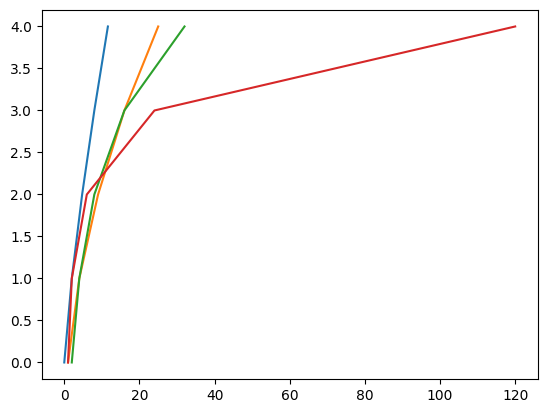

In [6]:
import matplotlib.pyplot as plt

N = 5
x_axis = [i for i in range(N)]
plt.plot(nlogn(N), x_axis)
plt.plot(nn(N), x_axis)
plt.plot(npow2(N), x_axis)
plt.plot(factorial(N), x_axis)
plt.show()

## 2.번

$\sum_{j = 1}^{n} j$ 코딩으로 변경


In [7]:
def natural_sum(n: int) -> int:
    """ 자연수 합 """
    start_time = time.time()
    for i in range(1, n):
        pass
    end_time = time.time()
    return end_time - start_time

In [8]:
natural_sum(n=10)

0.0

## 3.번

$n * n$ 코딩으로 변경


In [9]:
def n_mul_n(n: int) -> int:
    """ n * n 함수 """
    start_time = time.time()
    for _ in range(n):
        for _ in range(n):
            pass
    end_time = time.time()
    return end_time - start_time

In [10]:
n_mul_n(n=10)

0.0

## 테이블화

In [11]:
import pandas as pd

data = {}
for i in range(1, 6):
    if (n := 10 ** i) not in data.keys():
        data[n] = [natural_sum(n), n_mul_n(n)]

pd.DataFrame(data=data, index=["natural_sum", "n * n"])

,10,100,1000,10000,100000
natural_sum,0.0,0.000000,0.000000,0.000000,0.002992
n * n,0.0,0.000998,0.046874,6.064548,286.643352
